In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from importlib import reload
import os
from os.path import join
import subprocess
import sys
sys.path.append('../../') # lets us import ptype package from the subdir
#import ptype.
import time
from tqdm import tqdm

import soundings.utils as utils
import soundings.mr_analysis as mra
from soundings.mr_analysis import SoundingQuery

select 

- variable to plot
- subset of data:
    - 'case_study_day' : 
        - 'new_york_1-20221215', 'new_york_1-20221216', 'new_york_1-20221217', 
        - 'new_york_2-20220203', 'new_york_2-20220204', 
        - 'kentucky-20220223','kentucky-20220224'
    - init_hr:
        - rap,hrrr: 0 - 23
    - step:
        - np.timedelta(x, 'h') for x = 1, ..., 18

In [2]:
data_dir = "/glade/work/dkimpara/ptype-aggs"
model = 'rap'
ds = xr.open_dataset(join(data_dir,f"{model}_all.nc"), engine='netcdf4')

color_dict = {'NWP': '#FF7F0E',
              'ML': '#1F77B4'}

lstyledict = {'t_h': 'solid',
              'dpt_h': 'dashed',
              'wb_h': 'dotted'}



In [3]:
def plot_disagree(fig, ax, ds, ptype, model, sel):
    ds = ds.where(ds[model + ptype])
    for t in tqdm(times, desc = f'Plotting all steps (if exists) for {predtype}'):
        if stat == 'median':
            profile = query.quantile(0.5, predtype, var, {'step': [step]} | select_case)
            profile = profile[f'{var}_q'].sel(quantile=0.5).values.flatten()
        else:
            profile = query.query(predtype, var, stat, {'step': [step]} | select_case)
            profile = profile[f'{var}_{stat}'].values.flatten()
        
        ax.plot(profile, h, color=color, linestyle=lstyledict[var])

    return fig, ax

def plot_by_step(steps = [1, 6, 12, 18]):

    bad = ['cfrzr', 'cicep']
    good = ['csnow', 'crain']
    allptypes = [bad,good]
    res_axs = []

    for pair in allptypes:
        fig, axs = utils.skewCompositeFigAx(figsize=(10,5),num_subplots=2)
        for ax, ptype in zip(axs, pair):
            fig, ax = plot_disagree(fig, ax, ds, query, steps, 'ML_' + ptype, color_dict['ML'])
            fig, ax = plot_disagree(fig, ax, ds, query, steps, ptype, color_dict['NWP'])

            line, = ax.plot([],[], color=color_dict['ML'])
            line.set_label(f'ML')
            line, = ax.plot([],[], color=color_dict['NWP'])
            line.set_label(f'{model}')

            ax.set_xlabel('Temperature (C)')
            ax.set_ylabel('HeightAboveGround (m)')
            ax.set_xlim(-10,20)
            ax.set_title(f'{ptype[1:]} {stat} {var}')
            ax.legend(title=f'Displayed steps:\n{plotted_steps}h\nDarker = smaller step')
            res_axs.append(ax)
        fig.suptitle(f'Data Subset: {select_case}', fontsize=10)
            
    return res_axs

Plotting all steps (if exists) for crain: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]


(-6.0, 10.0)

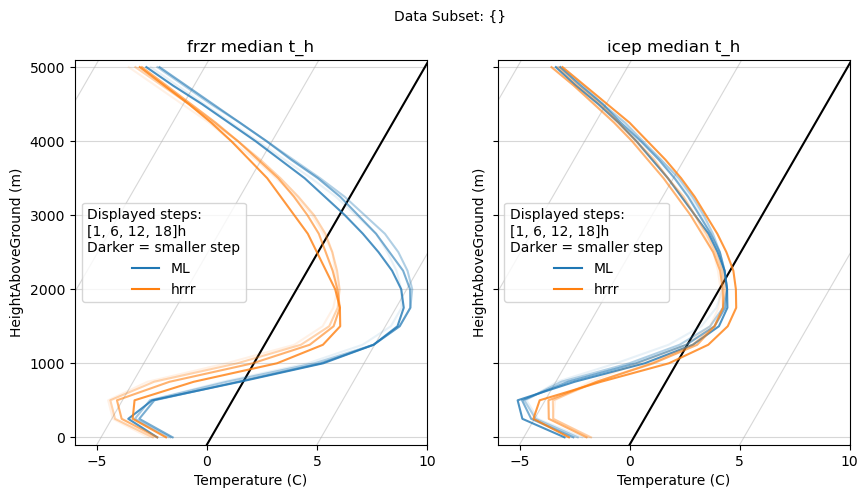

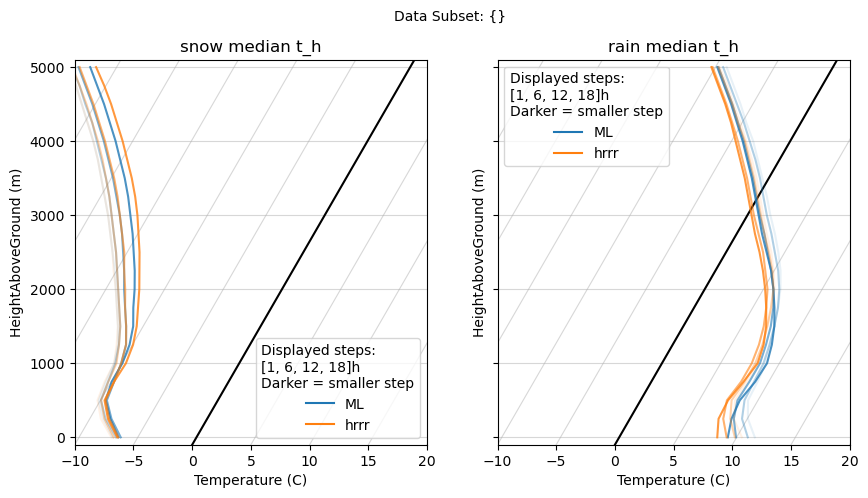

In [4]:
select_case = {
               #'case_study_day': 'kentucky-20220224',
               #'init_hr': [0,2],
              }
#which profile to plot
var = 't_h'
stat= 'median' #mean or median

res_axs = plot_by_step()
res_axs[0].set_xlim(-6,10)
res_axs[1].set_xlim(-6,10)

## plot the same figures and selecting by case_study_day, valid_time, init_hr, etc

In [ ]:
# code will take care of nans for you
# takes a little longer because masking by valid_time instead of selecting
select_case = {
               #'case_study_day': 'new_york_1-20221215',
               #'init_hr': [0,2],
               'valid_time': np.datetime64('2022-12-15T18:00:00.000000000')
              } 
#which profile to plot
var = 't_h'
stat= 'mean' #mean or median

res_axs = plot_by_step()
res_axs[0].set_xlim(-6,12)
res_axs[1].set_xlim(-6,12)

Plotting all steps (if exists) for csnow:  75%|███████▌  | 3/4 [00:06<00:02,  2.20s/it]